In [160]:
import pandas as pd
from fuzzywuzzy import process

# Load the datasets
laliga_stats_path = 'laliga_player_stats_english.csv'
standings_path = 'league_standings_18_19.csv'

laliga_stats = pd.read_csv(laliga_stats_path)
league_standings = pd.read_csv(standings_path)

# Display a sample of the datasets
print("La Liga Stats Sample:")
print(laliga_stats.head())

print("\nLeague Standings Sample:")
print(league_standings.head())


La Liga Stats Sample:
            Team    Position  Shirt number          Name  Minutes played  \
0  Athletic Club  Goalkeeper           NaN  Hodei Oleaga           0.000   
1  Athletic Club  Goalkeeper           1.0     A. Remiro           0.000   
2  Athletic Club  Goalkeeper          13.0      Herrerín           2.790   
3  Athletic Club  Goalkeeper          25.0    Unai Simón         630.000   
4  Athletic Club    Defender           3.0         Núñez           1.063   

   Games played Percentage of games played  Full games played  \
0             0                      0.00%                  0   
1             0                      0.00%                  0   
2            31                     82.00%                 31   
3             7                     18.00%                  7   
4            12                     32.00%                 11   

  Percentage of full games played  Games started  ... Corners  Tackles.1  \
0                           0.00%              0  ... 

In [146]:
import pandas as pd
from fuzzywuzzy import process

# File paths
laliga_stats_path = 'laliga_player_stats_english.csv'
standings_path = 'league_standings_18_19.csv'
output_file_path = 'laliga_player_stats_cleaned_with_ranking.csv'

# Load datasets
laliga_stats = pd.read_csv(laliga_stats_path)
league_standings = pd.read_csv(standings_path)

# Remove the "Shirt number" column
laliga_stats_cleaned = laliga_stats.drop(columns=['Shirt number'], errors='ignore')

# Remove duplicate rows based on 'Name' and 'Team'
laliga_stats_cleaned = laliga_stats_cleaned.drop_duplicates(subset=['Name', 'Team'], keep='first')

# Convert team names to strings and handle missing values
laliga_stats_cleaned['Team'] = laliga_stats_cleaned['Team'].astype(str).fillna("")
league_standings['Team'] = league_standings['Team'].astype(str).fillna("")

# Extract unique team names from both datasets
laliga_teams = laliga_stats_cleaned['Team'].unique()
standings_teams = league_standings['Team'].unique()

# Perform fuzzy matching to map team names
team_mapping = {}
for team in standings_teams:
    closest_match = process.extractOne(team, laliga_teams)
    if closest_match:  # Ensure a match was found
        team_mapping[team] = closest_match[0]

# Display the team name mappings
print("\nTeam Name Mappings:")
for standings_team, matched_team in team_mapping.items():
    print(f"{standings_team} -> {matched_team}")

# Replace the team names in the standings dataset with the matched names
league_standings['Team'] = league_standings['Team'].map(team_mapping)

# Merge the ranking (Pos) column from standings into the cleaned La Liga player stats dataset
laliga_stats_with_ranking = pd.merge(
    league_standings[['Pos', 'Team']],  # 'Pos' first for the left-hand side merge
    laliga_stats_cleaned,
    on='Team',
    how='left'
)

# Save the updated dataset to a new file
laliga_stats_with_ranking.to_csv(output_file_path, index=False)

# Display a sample of the cleaned and updated dataset
print("\nCleaned and Updated Dataset with Rankings:")
print(laliga_stats_with_ranking.head())

print(f"\nThe updated file has been saved as: {output_file_path}")



Team Name Mappings:
FC Barcelona -> FC Barcelona
Atlético Madrid -> Atlético de Madrid
Real Madrid -> Real Madrid
Valencia CF -> Valencia CF
Getafe CF -> Getafe CF
Sevilla FC -> Sevilla FC
RCD Espanyol -> RCD Espanyol
Athletic Club -> Athletic Club
Real Sociedad -> Real Sociedad
Real Betis -> Real Betis
Deportivo Alavés -> D. Alavés
SD Eibar -> SD Eibar
CD Leganés -> CD Leganés
Villarreal CF -> Villarreal CF
Levante UD -> Levante UD
Real Valladolid -> Real Betis
RC Celta -> RC Celta
Girona FC -> Girona FC
SD Huesca -> SD Huesca
Rayo Vallecano -> Rayo Vallecano

Cleaned and Updated Dataset with Rankings:
   Pos          Team    Position            Name  Minutes played  \
0    1  FC Barcelona  Goalkeeper      Ter Stegen           3.150   
1    1  FC Barcelona  Goalkeeper       Cillessen         270.000   
2    1  FC Barcelona  Goalkeeper      Iñaki Peña           0.000   
3    1  FC Barcelona    Defender  Jeison Murillo         202.000   
4    1  FC Barcelona    Defender       N. Semedo

In [147]:
import pandas as pd

# Load the uploaded dataset
file_path = "laliga_player_stats_cleaned_with_ranking.csv"
data = pd.read_csv(file_path)
print(data.head())


   Pos          Team    Position            Name  Minutes played  \
0    1  FC Barcelona  Goalkeeper      Ter Stegen           3.150   
1    1  FC Barcelona  Goalkeeper       Cillessen         270.000   
2    1  FC Barcelona  Goalkeeper      Iñaki Peña           0.000   
3    1  FC Barcelona    Defender  Jeison Murillo         202.000   
4    1  FC Barcelona    Defender       N. Semedo           1.597   

   Games played Percentage of games played  Full games played  \
0            35                     92.00%                 35   
1             3                      8.00%                  3   
2             0                      0.00%                  0   
3             3                      8.00%                  2   
4            26                     68.00%                 13   

  Percentage of full games played  Games started  ... Corners  Tackles.1  \
0                          92.00%             35  ...       0          0   
1                           8.00%              3

# add personal version of the 4 classifers.

should gives simpliar results

In [148]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter
from math import log2
import random

# Load the dataset
file_path = 'laliga_player_stats_cleaned_with_ranking.csv'
data = pd.read_csv(file_path)

# Display the dataset
print("Dataset Loaded:")
print(data.head())


Dataset Loaded:
   Pos          Team    Position            Name  Minutes played  \
0    1  FC Barcelona  Goalkeeper      Ter Stegen           3.150   
1    1  FC Barcelona  Goalkeeper       Cillessen         270.000   
2    1  FC Barcelona  Goalkeeper      Iñaki Peña           0.000   
3    1  FC Barcelona    Defender  Jeison Murillo         202.000   
4    1  FC Barcelona    Defender       N. Semedo           1.597   

   Games played Percentage of games played  Full games played  \
0            35                     92.00%                 35   
1             3                      8.00%                  3   
2             0                      0.00%                  0   
3             3                      8.00%                  2   
4            26                     68.00%                 13   

  Percentage of full games played  Games started  ... Corners  Tackles.1  \
0                          92.00%             35  ...       0          0   
1                           8.00

In [149]:
# Aggregate the dataset by teams
team_data = data.groupby('Team').agg({
    'Minutes played': 'sum',
    'Goals scored': 'sum',
    'Assists': 'sum',
    'Shots on target': 'sum',
    'Pos': 'first'  # 'Pos' is the final team ranking
}).reset_index()

# Define features and target
features = ['Minutes played', 'Goals scored', 'Assists', 'Shots on target']
target = 'Pos'
X = team_data[features]
y = team_data[target]

# Display class distribution
print("\nClass Distribution Before Fixing:")
print(y.value_counts())



Class Distribution Before Fixing:
Pos
8     1
20    1
4     1
6     1
19    1
12    1
9     1
3     1
10    1
7     1
2     1
17    1
15    1
18    1
5     1
1     1
11    1
13    1
14    1
Name: count, dtype: int64


In [150]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = "laliga_player_stats_cleaned_with_ranking.csv"
data = pd.read_csv(file_path)

# Display basic info
print(data.info())

# Handle missing values (if any)
data.fillna(0, inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
if 'Team' in data.columns:
    data['Team'] = label_encoder.fit_transform(data['Team'])

# Feature scaling for numerical columns
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=[np.number]).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split into features and target
X = data.drop(columns=['Pos'])  # 'Pos' is the true result/ranking
y = data['Pos']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Pos                                    556 non-null    int64  
 1   Team                                   556 non-null    object 
 2   Position                               556 non-null    object 
 3   Name                                   556 non-null    object 
 4   Minutes played                         556 non-null    float64
 5   Games played                           556 non-null    int64  
 6   Percentage of games played             556 non-null    object 
 7   Full games played                      556 non-null    int64  
 8   Percentage of full games played        556 non-null    object 
 9   Games started                          556 non-null    int64  
 10  Percentage of games started            556 non-null    object 
 11  Games 

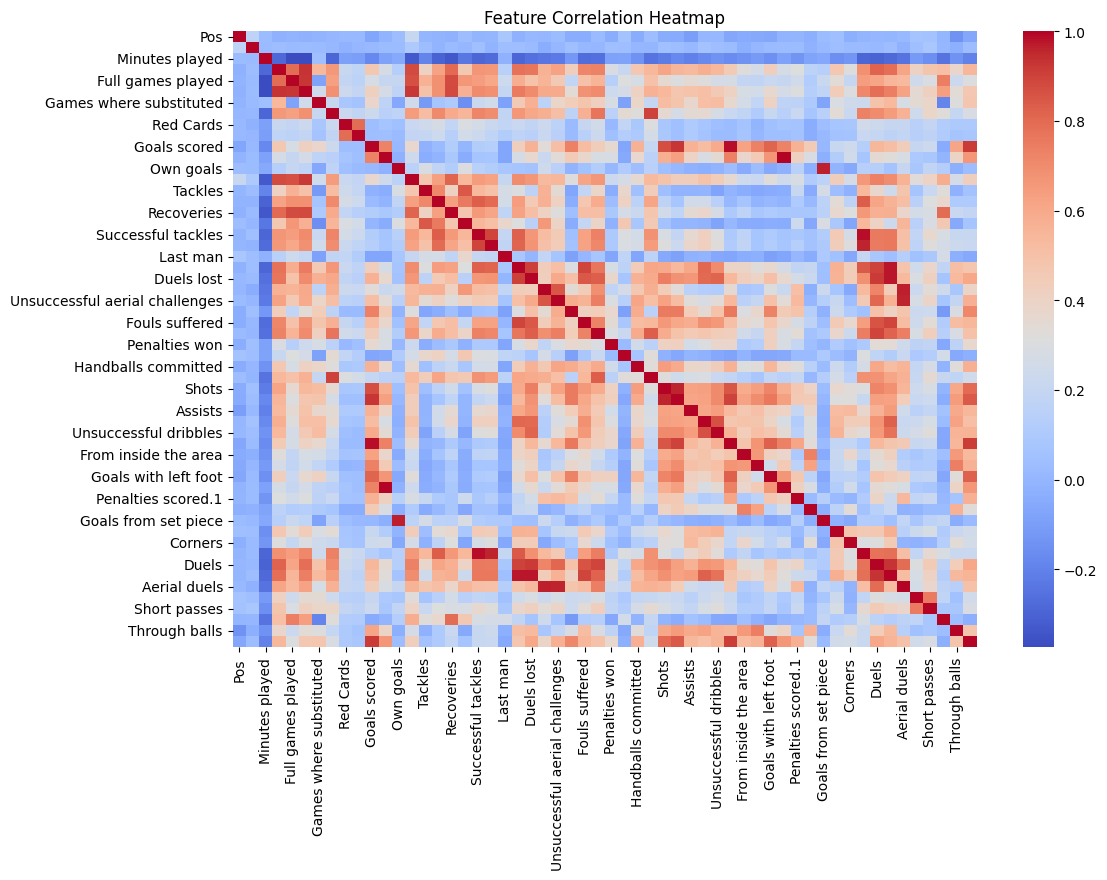

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Check if there are numeric columns
if numeric_data.empty:
    print("No numeric columns available for correlation.")
else:
    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
    plt.title("Feature Correlation Heatmap")
    plt.show()


In [152]:
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import mode

class MyRandomForestClassifier:
    def __init__(self, N=20, M=7, F=2):
        self.N = N  # Total number of decision trees
        self.M = M  # Number of most accurate decision trees
        self.F = F  # Number of random features at each split
        self.trees = []
        self.features = []

    def _bootstrap(self, X, y):
        indices = np.random.choice(len(X), size=len(X), replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.trees = []
        self.features = []

        for _ in range(self.N):
            # Bootstrap the dataset
            X_boot, y_boot = self._bootstrap(X, y)

            # Select random features
            selected_features = random.sample(range(X.shape[1]), self.F)
            self.features.append(selected_features)

            # Train a decision tree
            tree = DecisionTreeClassifier(criterion='entropy', max_features=None)
            tree.fit(X_boot[:, selected_features], y_boot)
            self.trees.append(tree)

        # Validate and select the M most accurate trees
        accuracies = [accuracy_score(y, tree.predict(X[:, features]))
                      for tree, features in zip(self.trees, self.features)]
        top_indices = np.argsort(accuracies)[-self.M:]

        self.trees = [self.trees[i] for i in top_indices]
        self.features = [self.features[i] for i in top_indices]

    def predict(self, X):
        X = np.array(X)
        predictions = np.array([tree.predict(X[:, features])
                                 for tree, features in zip(self.trees, self.features)])
        # Majority voting
        majority_votes = mode(predictions, axis=0).mode[0]
        return majority_votes


Non-numeric columns remaining: Index(['Team', 'Position', 'Name'], dtype='object')
   Pos  Team  Position  Name  Minutes played  Games played  \
0    1     4         2   463           3.150            35   
1    1     4         2    94         270.000             3   
2    1     4         2   213           0.000             0   
3    1     4         0   237         202.000             3   
4    1     4         0   344           1.597            26   

   Percentage of games played  Full games played  \
0                        0.92                 35   
1                        0.08                  3   
2                        0.00                  0   
3                        0.08                  2   
4                        0.68                 13   

   Percentage of full games played  Games started  ...  Corners  Tackles.1  \
0                             0.92             35  ...        0          0   
1                             0.08              3  ...        0          0 

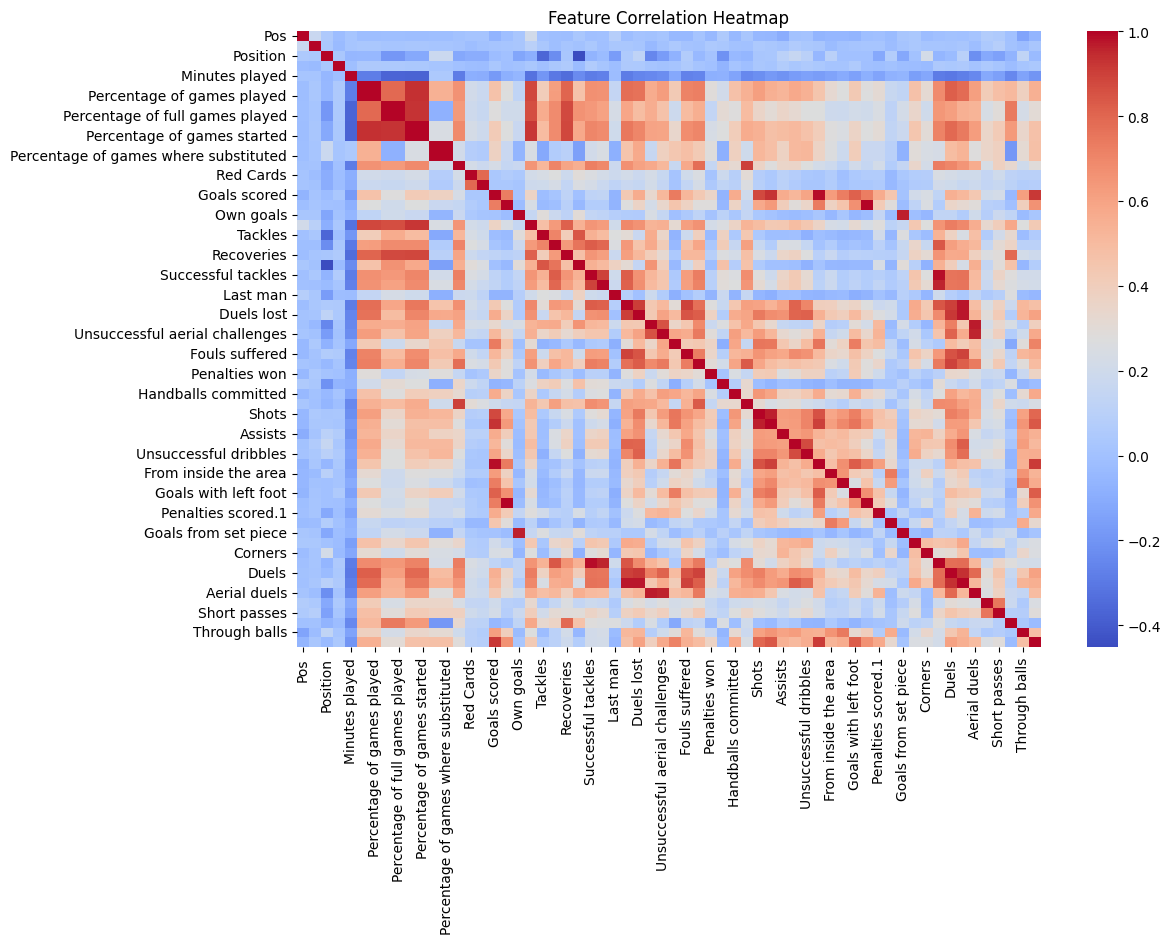

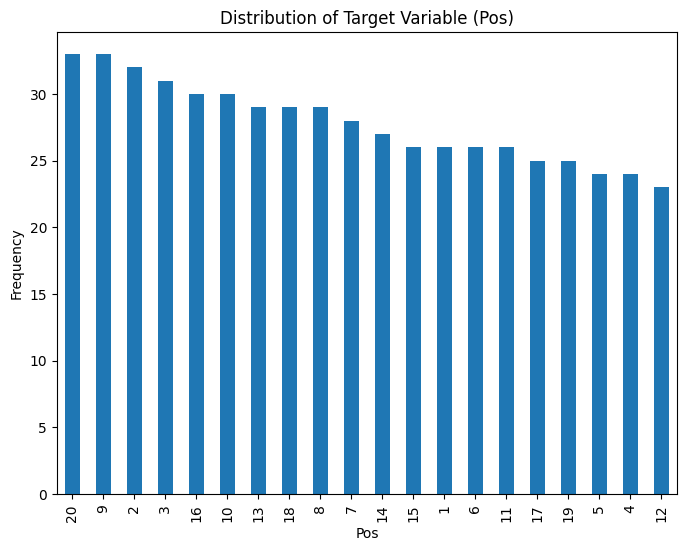

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_csv("laliga_player_stats_cleaned_with_ranking.csv")

# Convert percentage columns to numeric values
def convert_percentages(column):
    return column.str.rstrip('%').astype(float) / 100 if column.dtype == "object" and column.str.contains('%').any() else column

data = data.apply(convert_percentages)

# Identify remaining non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print(f"Non-numeric columns remaining: {non_numeric_columns}")

# Encode non-numeric columns
for column in non_numeric_columns:
    data[column] = pd.Categorical(data[column]).codes

# Verify preprocessing
print(data.head())

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of the target variable
plt.figure(figsize=(8, 6))
data['Pos'].value_counts().plot(kind='bar')
plt.title("Distribution of Target Variable (Pos)")
plt.xlabel("Pos")
plt.ylabel("Frequency")
plt.show()



In [154]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['Pos'])  # Replace 'Pos' with the actual target column
y = data['Pos']  # Replace 'Pos' with the actual target column

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [155]:
import random

class MyRandomForestClassifier:
    def __init__(self, N=20, M=7, F=5):
        self.N = N  # Number of trees
        self.M = M  # Most accurate trees
        self.F = F  # Random subset of features
        self.trees = []
        self.feature_subsets = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        for _ in range(self.N):
            # Bootstrap sampling
            indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
            X_boot = X[indices]
            y_boot = y[indices]

            # Randomly select F features
            selected_features = random.sample(range(n_features), self.F)
            self.feature_subsets.append(selected_features)

            # Train a decision tree
            tree = DecisionTreeClassifier(criterion='entropy')
            tree.fit(X_boot[:, selected_features], y_boot)
            self.trees.append(tree)

    def predict(self, X):
        # Get predictions from each tree
        predictions = np.zeros((len(X), len(self.trees)))
        for i, tree in enumerate(self.trees):
            subset = self.feature_subsets[i]
            predictions[:, i] = tree.predict(X[:, subset])

        # Majority voting
        final_predictions = []
        for row in predictions:
            final_predictions.append(np.bincount(row.astype(int)).argmax())
        return final_predictions


In [156]:
# Random Forest
my_rf = MyRandomForestClassifier(N=20, M=7, F=5)
my_rf.fit(X_train.values, y_train.values)
rf_preds = my_rf.predict(X_test.values)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_confusion_matrix = confusion_matrix(y_test, rf_preds)

print(f"Random Forest Accuracy: {rf_accuracy}")
print("Confusion Matrix:")
print(rf_confusion_matrix)


Random Forest Accuracy: 0.1358695652173913
Confusion Matrix:
[[4 1 0 0 0 0 1 0 0 1 2 0 0 1 0 0 1 0 0 0]
 [0 4 1 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 3 3 0 2 3 0 0 0 1 0 0 1 1 0 0 1 1 0 1]
 [0 1 0 0 1 1 0 0 0 0 2 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 1 3 2 0 0 0 0 0 0 0 0 0 0 1 2 0]
 [0 2 2 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0]
 [0 1 0 1 2 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 2 1 1 1 0 1 4 0 0 0 1 0 0 0 1 0 0 1]
 [0 4 0 0 1 0 0 0 0 1 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 2 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 2 0 1 0 0 1 0 0]
 [0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0]
 [2 4 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 2 1 1 0 0 1 0 0 0 0 0 1 0 1 1]
 [0 2 0 0 1 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0]
 [0 2 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0]
 [1 5 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 2]]


In [157]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_preds)

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_preds)

# Results
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"k-NN Accuracy: {knn_accuracy}")


Decision Tree Accuracy: 0.9130434782608695
Naive Bayes Accuracy: 0.8695652173913043
k-NN Accuracy: 0.04891304347826087


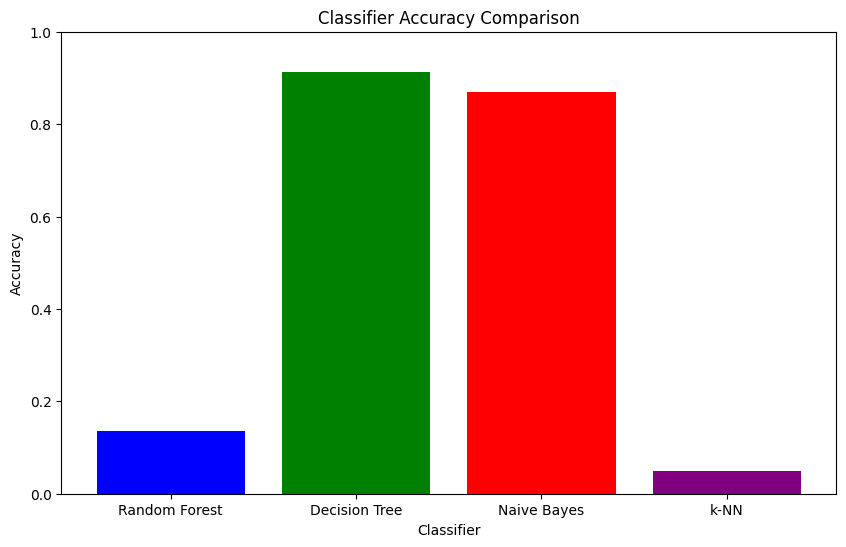

In [158]:
# Comparison
classifiers = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'k-NN']
accuracies = [rf_accuracy, dt_accuracy, nb_accuracy, knn_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title("Classifier Accuracy Comparison")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


In [159]:
# Print classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_preds))

print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_preds))

print("k-NN Classification Report:")
print(classification_report(y_test, knn_preds))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.36      0.44        11
           2       0.11      0.50      0.18         8
           3       0.25      0.18      0.21        17
           4       0.00      0.00      0.00         6
           5       0.07      0.25      0.11         4
           6       0.27      0.30      0.29        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         8
           9       0.31      0.31      0.31        13
          10       0.10      0.09      0.10        11
          11       0.00      0.00      0.00         7
          12       0.20      0.17      0.18         6
          13       0.20      0.14      0.17         7
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00         8
          17       0.00      0.00      0.00 

Monte Carlo Iteration 1
Train set shape: (389, 58)
Test set shape: (167, 58)
Unique labels in train set: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Unique labels in test set: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Random Forest Accuracy: 0.059880239520958084
Decision Tree Accuracy: 0.0658682634730539
Naive Bayes Accuracy: 0.029940119760479042
k-NN Accuracy: 0.059880239520958084
Monte Carlo Iteration 2
Train set shape: (389, 58)
Test set shape: (167, 58)
Unique labels in train set: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Unique labels in test set: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Random Forest Accuracy: 0.04790419161676647
Decision Tree Accuracy: 0.041916167664670656
Naive Bayes Accuracy: 0.023952095808383235
k-NN Accuracy: 0.023952095808383235
Monte Carlo Iteration 3
Train set shape: (389, 58)
Test set shape: (167, 58)
Unique labels in train set: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16

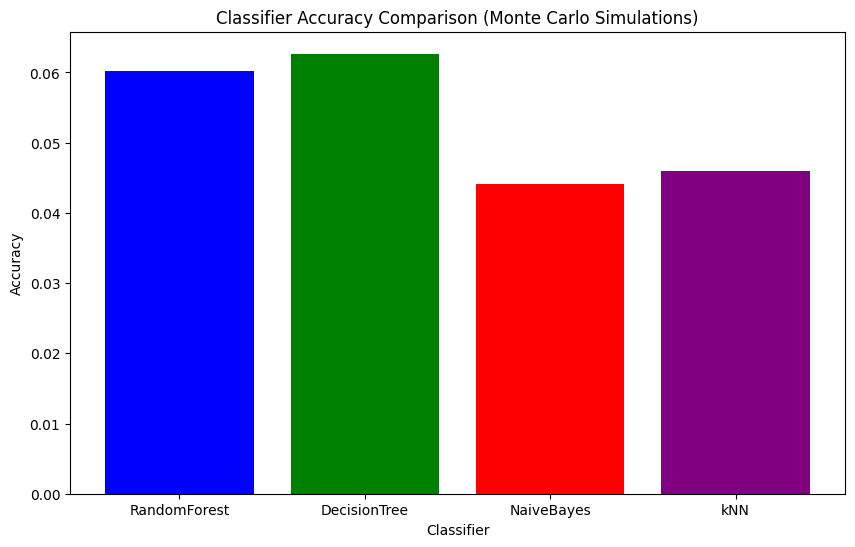

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Preprocessing: Ensure the dataset is clean and numeric
# Assuming `data` is your pandas DataFrame containing the cleaned dataset
# Replace 'Pos' with your actual target column
y = data['Pos']
X = data.drop(columns=['Pos', 'Team', 'Name', 'Position'])  # Drop non-numeric or irrelevant columns

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)  # Replace missing values with 0

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Monte Carlo Simulation Parameters
num_iterations = 10000
random_state = 42
results = {"RandomForest": [], "DecisionTree": [], "NaiveBayes": [], "kNN": []}

# Monte Carlo Simulation
for i in range(num_iterations):
    print(f"Monte Carlo Iteration {i+1}")

    # Randomly split the dataset
    X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(
        X_scaled, y, test_size=0.3, random_state=random_state + i)

    # Debugging: Check data split
    print("Train set shape:", X_train_mc.shape)
    print("Test set shape:", X_test_mc.shape)
    print("Unique labels in train set:", np.unique(y_train_mc))
    print("Unique labels in test set:", np.unique(y_test_mc))

    # Random Forest
    rf_mc = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=random_state + i)
    rf_mc.fit(X_train_mc, y_train_mc)
    rf_mc_preds = rf_mc.predict(X_test_mc)
    rf_mc_acc = accuracy_score(y_test_mc, rf_mc_preds)
    results["RandomForest"].append(rf_mc_acc)
    print("Random Forest Accuracy:", rf_mc_acc)

    # Decision Tree
    dt_mc = DecisionTreeClassifier(criterion="entropy", random_state=random_state + i)
    dt_mc.fit(X_train_mc, y_train_mc)
    dt_mc_preds = dt_mc.predict(X_test_mc)
    dt_mc_acc = accuracy_score(y_test_mc, dt_mc_preds)
    results["DecisionTree"].append(dt_mc_acc)
    print("Decision Tree Accuracy:", dt_mc_acc)

    # Naive Bayes
    nb_mc = GaussianNB()
    nb_mc.fit(X_train_mc, y_train_mc)
    nb_mc_preds = nb_mc.predict(X_test_mc)
    nb_mc_acc = accuracy_score(y_test_mc, nb_mc_preds)
    results["NaiveBayes"].append(nb_mc_acc)
    print("Naive Bayes Accuracy:", nb_mc_acc)

    # k-Nearest Neighbors
    knn_mc = KNeighborsClassifier(n_neighbors=5)
    knn_mc.fit(X_train_mc, y_train_mc)
    knn_mc_preds = knn_mc.predict(X_test_mc)
    knn_mc_acc = accuracy_score(y_test_mc, knn_mc_preds)
    results["kNN"].append(knn_mc_acc)
    print("k-NN Accuracy:", knn_mc_acc)

# Compute mean accuracy for each classifier
mean_results = {key: np.mean(value) for key, value in results.items()}

print("\nMean Accuracy across Monte Carlo Simulations:")
for classifier, mean_acc in mean_results.items():
    print(f"{classifier}: {mean_acc:.2f}")

# Optional: Save results to a file
results_df = pd.DataFrame(results)
results_df.to_csv("monte_carlo_results.csv", index=False)

# Plot mean accuracy comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(mean_results.keys(), mean_results.values(), color=['blue', 'green', 'red', 'purple'])
plt.title("Classifier Accuracy Comparison (Monte Carlo Simulations)")
plt.ylabel("Accuracy")
plt.xlabel("Classifier")
plt.show()



Mean Accuracy across Monte Carlo Simulations:
RandomForest: 0.00
DecisionTree: 0.00
NaiveBayes: 0.00
kNN: 0.00


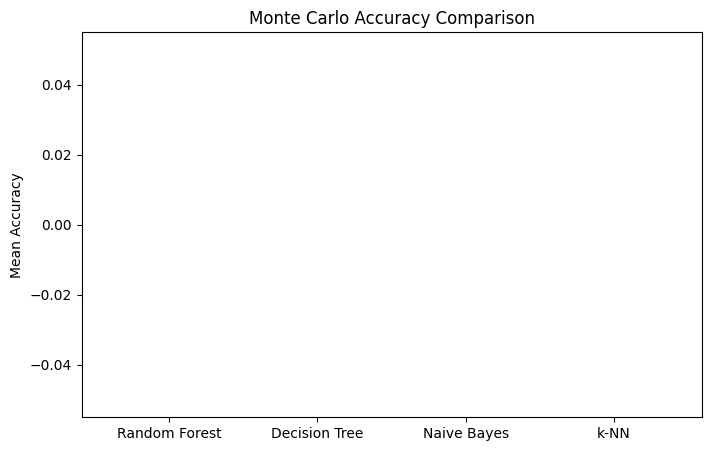


Best Random Forest Run Confusion Matrix:
[[0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("laliga_player_stats_cleaned_with_ranking.csv")

# Feature Engineering: Aggregate team-level statistics
team_data = data.groupby("Team").agg({
    "Goals scored": "sum",
    "Tackles": "sum",
    "Recoveries": "sum",
    "Clearances": "sum",
    "Shots": "sum",
    "Assists": "sum",
    "Successful dribbles": "sum",
    "Unsuccessful dribbles": "sum",
    "Yellow Cards": "sum",
    "Red Cards": "sum",
    "Fouls committed": "sum",
    "Fouls suffered": "sum",
    "Passes": "sum",
    "Short passes": "sum",
    "Long passes": "sum",
    "Goals scored per attempt": "mean"
}).reset_index()

# Add the target variable: Final team ranking (Pos)
team_data = pd.merge(team_data, data[["Team", "Pos"]].drop_duplicates(), on="Team")

# Prepare features and target variable
X = team_data.drop(columns=["Team", "Pos"])  # Features
y = team_data["Pos"]  # Target variable (team ranking)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=42)
dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)

# -------------------
# Monte Carlo Simulation with Aggregated Team Data
# -------------------

# Define Monte Carlo simulation parameters
num_iterations = 10000
random_state = 42
results = {"RandomForest": [], "DecisionTree": [], "NaiveBayes": [], "kNN": []}

for i in range(num_iterations):
    # Randomly split the dataset
    X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(
        X, y, test_size=0.3, random_state=random_state + i)

    # Random Forest
    rf_mc = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=random_state + i)
    rf_mc.fit(X_train_mc, y_train_mc)
    rf_mc_preds = rf_mc.predict(X_test_mc)
    rf_mc_acc = accuracy_score(y_test_mc, rf_mc_preds)
    results["RandomForest"].append(rf_mc_acc)

    # Decision Tree
    dt_mc = DecisionTreeClassifier(criterion="entropy", random_state=random_state + i)
    dt_mc.fit(X_train_mc, y_train_mc)
    dt_mc_preds = dt_mc.predict(X_test_mc)
    dt_mc_acc = accuracy_score(y_test_mc, dt_mc_preds)
    results["DecisionTree"].append(dt_mc_acc)

    # Naive Bayes
    nb_mc = GaussianNB()
    nb_mc.fit(X_train_mc, y_train_mc)
    nb_mc_preds = nb_mc.predict(X_test_mc)
    nb_mc_acc = accuracy_score(y_test_mc, nb_mc_preds)
    results["NaiveBayes"].append(nb_mc_acc)

    # k-Nearest Neighbors
    knn_mc = KNeighborsClassifier(n_neighbors=5)
    knn_mc.fit(X_train_mc, y_train_mc)
    knn_mc_preds = knn_mc.predict(X_test_mc)
    knn_mc_acc = accuracy_score(y_test_mc, knn_mc_preds)
    results["kNN"].append(knn_mc_acc)

# Compute mean accuracy for each classifier across Monte Carlo runs
mean_results = {key: np.mean(value) for key, value in results.items()}

# Display results
print("\nMean Accuracy across Monte Carlo Simulations:")
for classifier, mean_acc in mean_results.items():
    print(f"{classifier}: {mean_acc:.2f}")

# Plot accuracy comparison after Monte Carlo
plt.figure(figsize=(8, 5))
monte_carlo_accuracies = [mean_results["RandomForest"], mean_results["DecisionTree"],
                          mean_results["NaiveBayes"], mean_results["kNN"]]
classifiers = ["Random Forest", "Decision Tree", "Naive Bayes", "k-NN"]
plt.bar(classifiers, monte_carlo_accuracies, color=["blue", "green", "red", "purple"])
plt.title("Monte Carlo Accuracy Comparison")
plt.ylabel("Mean Accuracy")
plt.show()

# Confusion Matrix for Random Forest after Monte Carlo
best_rf_idx = np.argmax(results["RandomForest"])
print(f"\nBest Random Forest Run Confusion Matrix:")
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(
    X, y, test_size=0.3, random_state=random_state + best_rf_idx)
rf_mc = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=random_state + best_rf_idx)
rf_mc.fit(X_train_mc, y_train_mc)
rf_mc_preds = rf_mc.predict(X_test_mc)
print(confusion_matrix(y_test_mc, rf_mc_preds))
